✅ **미션: Robo-Surveillance - 로봇 감시 네트워크**


🤖 **미션 배경 스토리**
2050년, 도시는 완전한 자동화로 전환되었습니다.
모든 거리는 **감시 로봇(Robo-Guard)**이 순찰하며 범죄와 위험 상황을 감시합니다.
그러나, 최근 몇몇 범죄자들이 로봇의 시각 인식 시스템을 교란시켜 **위험한 물체(총기, 칼, 폭발물 등)**를 숨기고 있다는 보고가 있었습니다.

당신은 Robo-Guard AI 팀의 신입 엔지니어입니다.
당신의 임무는 CNN 기반의 이미지 분류기를 설계하여 로봇이 위험 물체를 빠르게 식별하고 경고를 발송하도록 하는 것입니다.



🛠️ **미션 요구사항**

**데이터셋 준비:**
- CIFAR-10 데이터셋을 사용하여 특정 클래스(총기, 칼, 폭발물 등)를 분류하도록 합니다.
- 추가적으로, `torchvision.transforms`를 사용하여 이미지에 잡음, 흐림, 왜곡을 추가해 위장 효과를 재현합니다.



**데이터 전처리:**

- 이미지 크기: 32x32 픽셀
- 데이터 증강:
  - RandomRotation: 0~15도 회전
  - GaussianBlur: 흐림 효과
  - ColorJitter: 색상 및 채도 조정 (위장 효과)
  - RandomHorizontalFlip: 좌우 반전



**CNN 모델 설계:**

- Conv2D (필터 크기: 3x3, 필터 수: 32, ReLU)
- MaxPooling2D (풀링 크기: 2x2)
- Conv2D (필터 크기: 3x3, 필터 수: 64, ReLU)
- MaxPooling2D (풀링 크기: 2x2)
- Conv2D (필터 크기: 3x3, 필터 수: 128, ReLU)
- Flatten
- Fully Connected Layer (256 노드, ReLU)
- Output Layer (10 노드, Softmax) ==> 크로스엔트로피로스를 사용 시 직접 모델에 추가하는 것이 좋을지 검토 필요



**훈련 파라미터:**

- 학습률: 0.001
- 배치 크기: 64
- 에포크: 20



**모델 평가:**

- Confusion Matrix를 사용하여 위험 물체의 식별 정확도를 시각화합니다.
- 정확도를 classification report로 출력


✅ 보너스 미션

CNN 모델의 정확도 등의 성능을 향상시키기 위한 방법을 모두 찾아보고 적용해볼것

✅ 참고자료: CIFAR-10 데이터셋 소개
📦 1. 데이터셋 개요:
CIFAR-10 (Canadian Institute for Advanced Research 10) 데이터셋은 10개의 서로 다른 클래스로 분류된 60,000개의 컬러 이미지로 구성되어 있습니다.

각 클래스는 6,000개의 이미지를 포함하고 있으며, 훈련 세트에는 50,000개, 테스트 세트에는 10,000개의 이미지가 있습니다.

이미지 크기는 32x32 픽셀로 고정되어 있으며, 3채널(RGB) 컬러 이미지로 구성됩니다.

🛠️ 2. 클래스 구성:
CIFAR-10의 클래스는 다음과 같습니다:

클래스 번호	클래스 이름
0	비행기 (Airplane)
1	자동차 (Automobile)
2	새 (Bird)
3	고양이 (Cat)
4	사슴 (Deer)
5	개 (Dog)
6	개구리 (Frog)
7	말 (Horse)
8	배 (Ship)
9	트럭 (Truck)

📦 3. 데이터셋 구조:
CIFAR-10은 torchvision에서 제공하는 내장 데이터셋으로, train과 test로 나누어져 있습니다.

다운로드 코드 예시:

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.GaussianBlur(kernel_size=(3, 3)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
# 훈련 데이터셋 다운로드 및 로드
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# 테스트 데이터셋 다운로드 및 로드
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 170M/170M [00:13<00:00, 12.4MB/s]


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class RoboNet(nn.Module):
    def __init__(self):
        super(RoboNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 32x32 → 16x16
        x = self.pool(F.relu(self.conv2(x)))  # 16x16 → 8x8
        x = self.pool(F.relu(self.conv3(x)))  # 8x8 → 4x4
        x = x.view(-1, 128 * 4 * 4) # Flatten
        x = F.relu(self.fc1(x))
        return self.fc2(x)  # CrossEntropyLoss 사용 시 Softmax 생략


In [ ]:
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # GPU 사용 가능 여부 확인
model = RoboNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/20], Loss: 1.4979
Epoch [2/20], Loss: 1.1809
Epoch [3/20], Loss: 1.0253
Epoch [4/20], Loss: 0.9233
Epoch [5/20], Loss: 0.8531
Epoch [6/20], Loss: 0.7987
Epoch [7/20], Loss: 0.7560
Epoch [8/20], Loss: 0.7214
Epoch [9/20], Loss: 0.6905
Epoch [10/20], Loss: 0.6602
Epoch [11/20], Loss: 0.6382
Epoch [12/20], Loss: 0.6166
Epoch [13/20], Loss: 0.5964
Epoch [14/20], Loss: 0.5794
Epoch [15/20], Loss: 0.5528
Epoch [16/20], Loss: 0.5462
Epoch [17/20], Loss: 0.5252
Epoch [18/20], Loss: 0.5084
Epoch [19/20], Loss: 0.4988
Epoch [20/20], Loss: 0.4951


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(model, dataloader, class_names):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # 정확도
    correct = np.sum(np.array(all_preds) == np.array(all_labels))
    total = len(all_labels)
    accuracy = 100 * correct / total
    print(f"✅ Test Accuracy: {accuracy:.2f}%\n")

    # 혼동 행렬
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    # 분류 성능 보고서
    print("📄 Classification Report:\n")
    print(classification_report(all_labels, all_preds, target_names=class_names))


✅ Test Accuracy: 75.05%



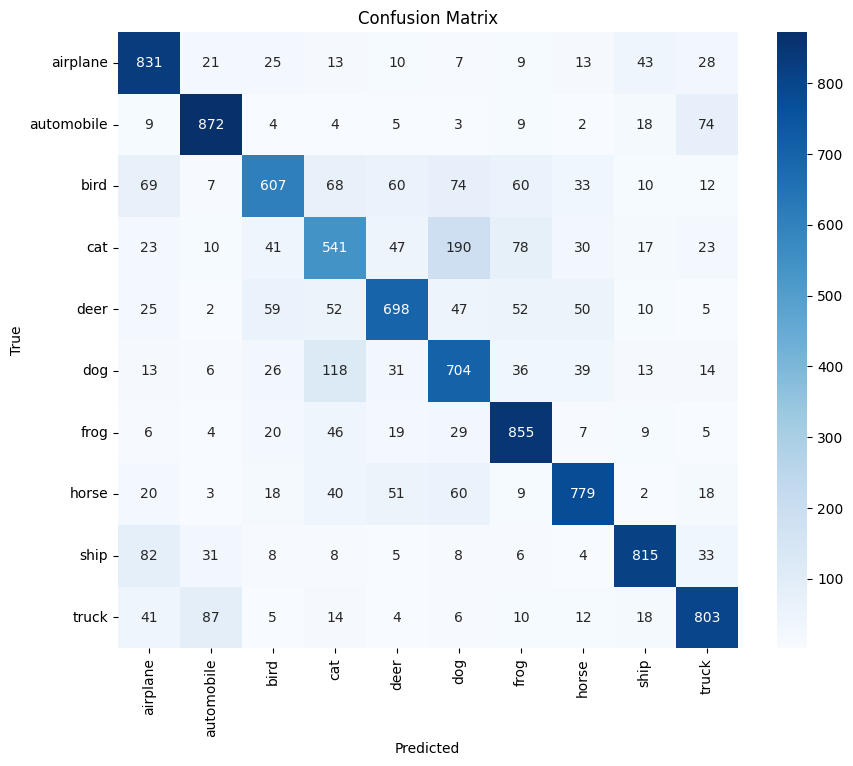

📄 Classification Report:

              precision    recall  f1-score   support

    airplane       0.74      0.83      0.78      1000
  automobile       0.84      0.87      0.85      1000
        bird       0.75      0.61      0.67      1000
         cat       0.60      0.54      0.57      1000
        deer       0.75      0.70      0.72      1000
         dog       0.62      0.70      0.66      1000
        frog       0.76      0.85      0.81      1000
       horse       0.80      0.78      0.79      1000
        ship       0.85      0.81      0.83      1000
       truck       0.79      0.80      0.80      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [ ]:
evaluate_model(model, test_loader, train_dataset.classes)
